# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

This is a [blog post](https://towardsdatascience.com/enchanted-random-forest-b08d418cb411#.hh7n1co54) by Jose Marcial Portilla, explaining the general logic of decision trees and random forests which you can check out.

## Import Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [66]:
df = pd.read_csv('kyphosis.csv')

In [67]:
df.head()

# 'Age' is on months, 'Number' is the number of vertebrae involved in the operation and
# the 'Start' is the number of the top most vertebrae that was operated on

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

In [68]:
df.info()

# quite a small database as you can see

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


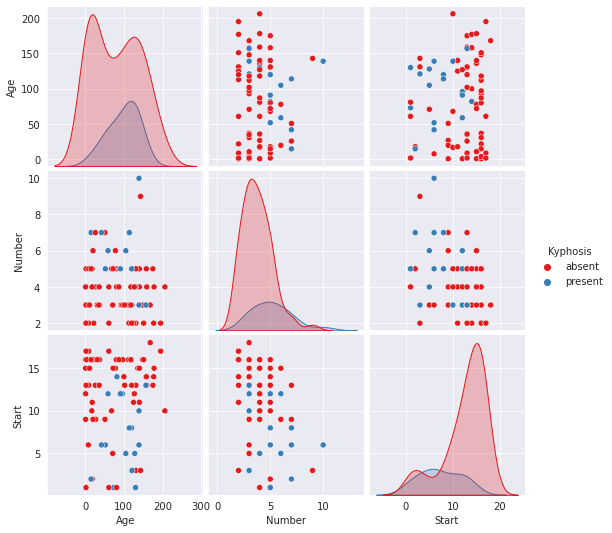

In [69]:
sns.pairplot(df, hue = 'Kyphosis', palette= 'Set1' )

## Train Test Split

Let's split up the data into a training set and a test set!

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Trees

We'll start just by training a single decision tree.

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtree = DecisionTreeClassifier()

In [75]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

Let's evaluate our decision tree.

In [76]:
prediction = dtree.predict(X_test)

In [77]:
from sklearn.metrics import  classification_report, confusion_matrix

In [78]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        21
     present       0.25      0.25      0.25         4

    accuracy                           0.76        25
   macro avg       0.55      0.55      0.55        25
weighted avg       0.76      0.76      0.76        25



[[18  3]
 [ 3  1]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier(n_estimators=200)

In [81]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [82]:
# Prediction

rfc_pred = rfc.predict(X_test)

In [83]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.89        21
     present       0.00      0.00      0.00         4

    accuracy                           0.80        25
   macro avg       0.42      0.48      0.44        25
weighted avg       0.70      0.80      0.75        25



[[20  1]
 [ 4  0]]


# Great Job!